## Análisis multivariante

Gráficos para analizar más de dos variables al mismo tiempo.

* sns.boxplot
* sns.pairplot()
* sns.replot() con hue, col, row, size
* sns.heatmap()
* sns.clustermap()

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../data/ficheros_procesados/datos_preprocesados.csv')
df.head(10)

,ANO,PAIS,REGION,ECONOMIA_PIB_PER_CAPITA,APOYO_SOCIAL,SALUD_ESPERANZA_DE_VIDA,LIBERTAD,PERCEPCION_CORRUPCION,GENEROSIDAD
0,2015,Islandia,Europa Occidental,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
1,2015,Dinamarca,Europa Occidental,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
2,2015,Noruega,Europa Occidental,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
3,2015,Finlandia,Europa Occidental,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351
4,2015,Suecia,Europa Occidental,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262
5,2015,España,Europa Occidental,1.23011,1.31379,0.95562,0.45951,0.06398,0.18227
6,2016,Dinamarca,Europa Occidental,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
7,2016,Islandia,Europa Occidental,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
8,2016,Noruega,Europa Occidental,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
9,2016,Finlandia,Europa Occidental,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492


In [5]:
df.shape

(54, 9)

In [6]:
df.isnull()

,ANO,PAIS,REGION,ECONOMIA_PIB_PER_CAPITA,APOYO_SOCIAL,SALUD_ESPERANZA_DE_VIDA,LIBERTAD,PERCEPCION_CORRUPCION,GENEROSIDAD
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

ANO                        0
PAIS                       0
REGION                     0
ECONOMIA_PIB_PER_CAPITA    0
APOYO_SOCIAL               0
SALUD_ESPERANZA_DE_VIDA    0
LIBERTAD                   0
PERCEPCION_CORRUPCION      0
GENEROSIDAD                0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ANO                      54 non-null     int64  
 1   PAIS                     54 non-null     object 
 2   REGION                   54 non-null     object 
 3   ECONOMIA_PIB_PER_CAPITA  54 non-null     float64
 4   APOYO_SOCIAL             54 non-null     float64
 5   SALUD_ESPERANZA_DE_VIDA  54 non-null     float64
 6   LIBERTAD                 54 non-null     float64
 7   PERCEPCION_CORRUPCION    54 non-null     float64
 8   GENEROSIDAD              54 non-null     float64
dtypes: float64(6), int64(1), object(2)
memory usage: 3.9+ KB


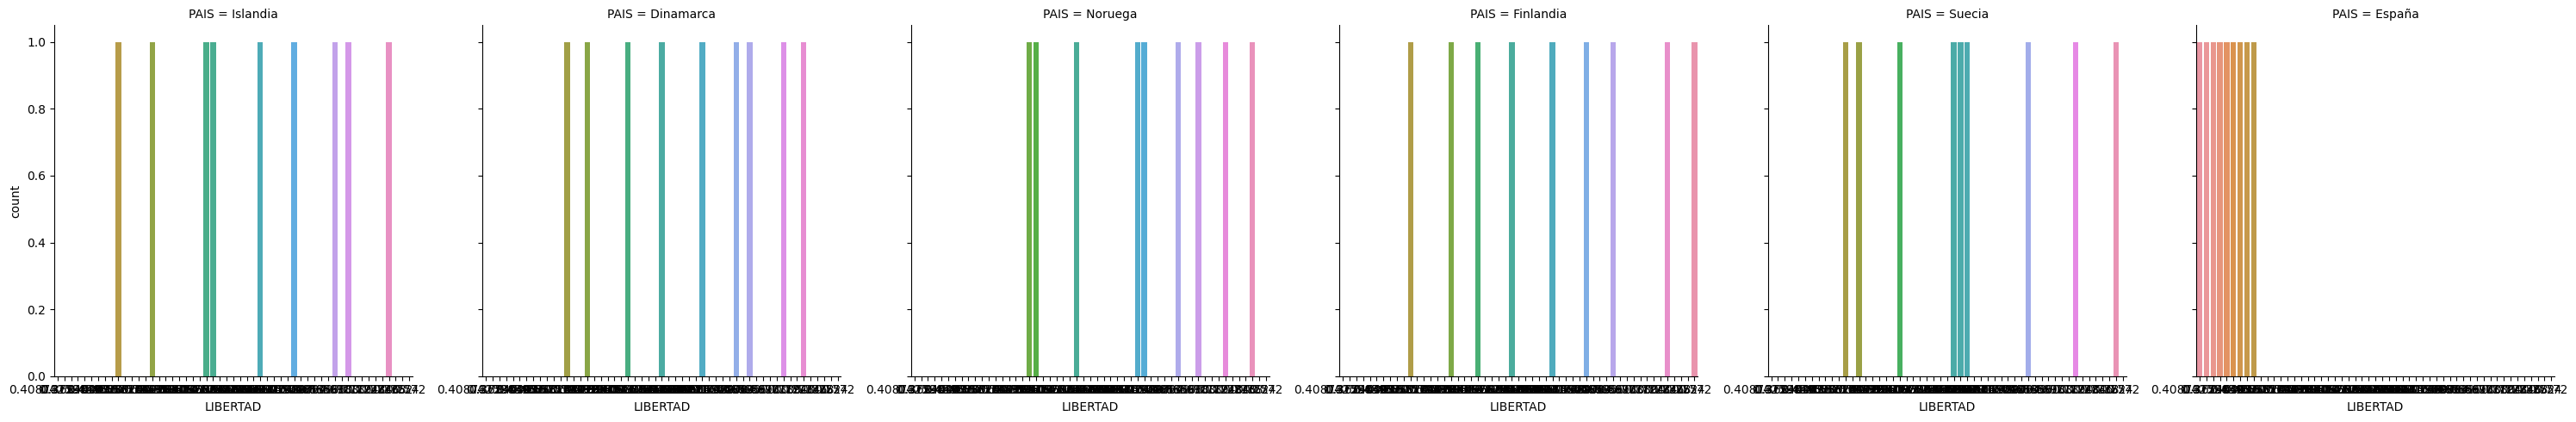

In [12]:
# sns.catplot permite dibujar varios gráficos categóricos en una figura
# Gráfico de conteo para mostrar la distribución de colores en cada categoría de corte cut
sns.catplot(data=df, x='LIBERTAD', col='PAIS', kind='count')

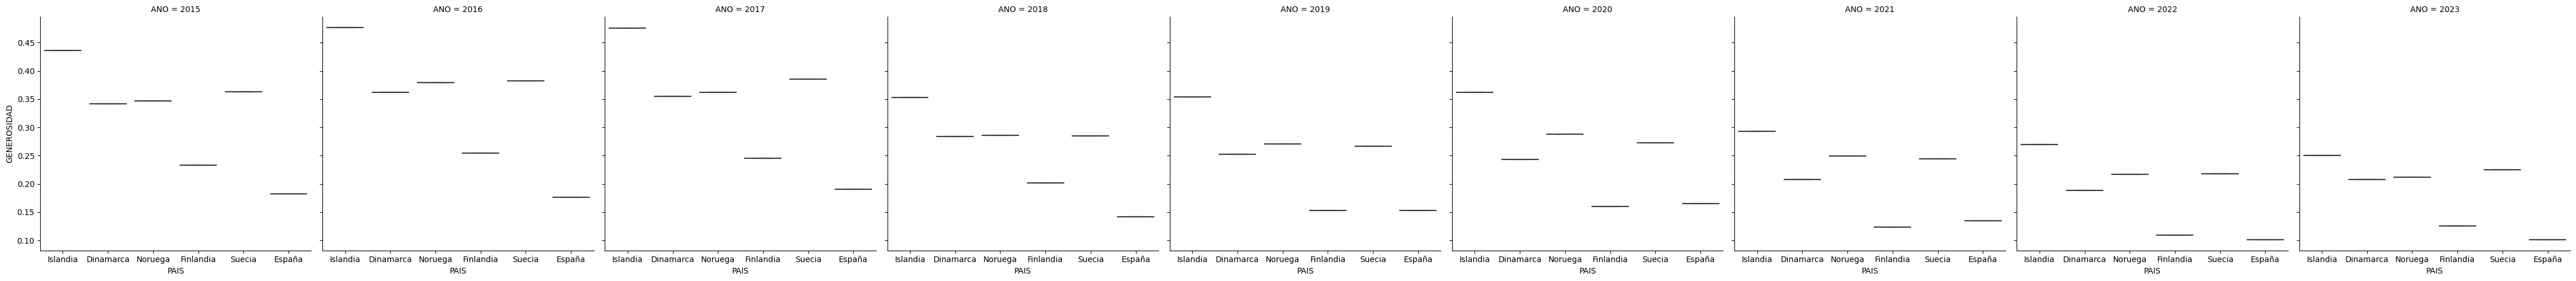

In [14]:
sns.catplot(data=df, x='PAIS', y='GENEROSIDAD', col='ANO', kind='box')

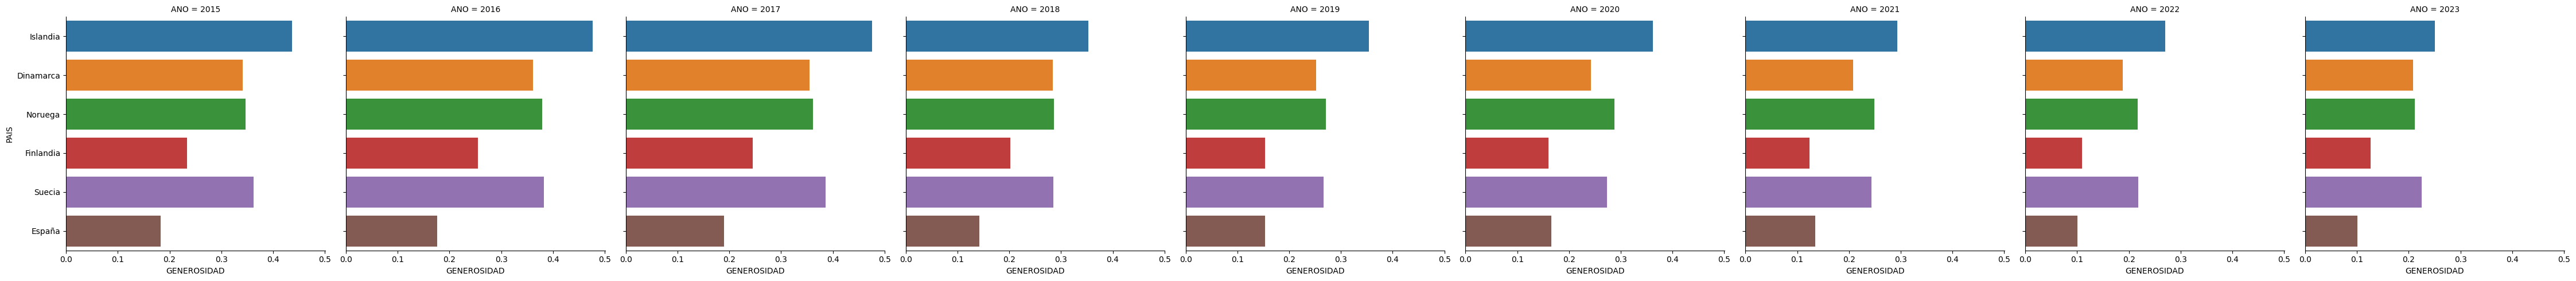

In [16]:
sns.catplot(data=df, x='GENEROSIDAD', y='PAIS', col='ANO', kind='bar', errorbar=None)

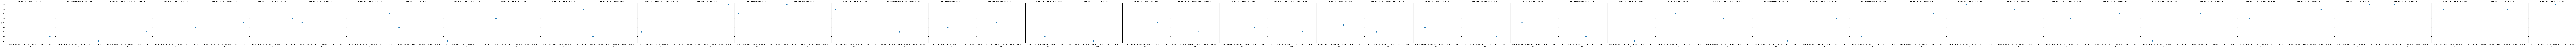

In [22]:
sns.catplot(data=df, x='PAIS', y='ANO', col='PERCEPCION_CORRUPCION', kind='point', errorbar=None)

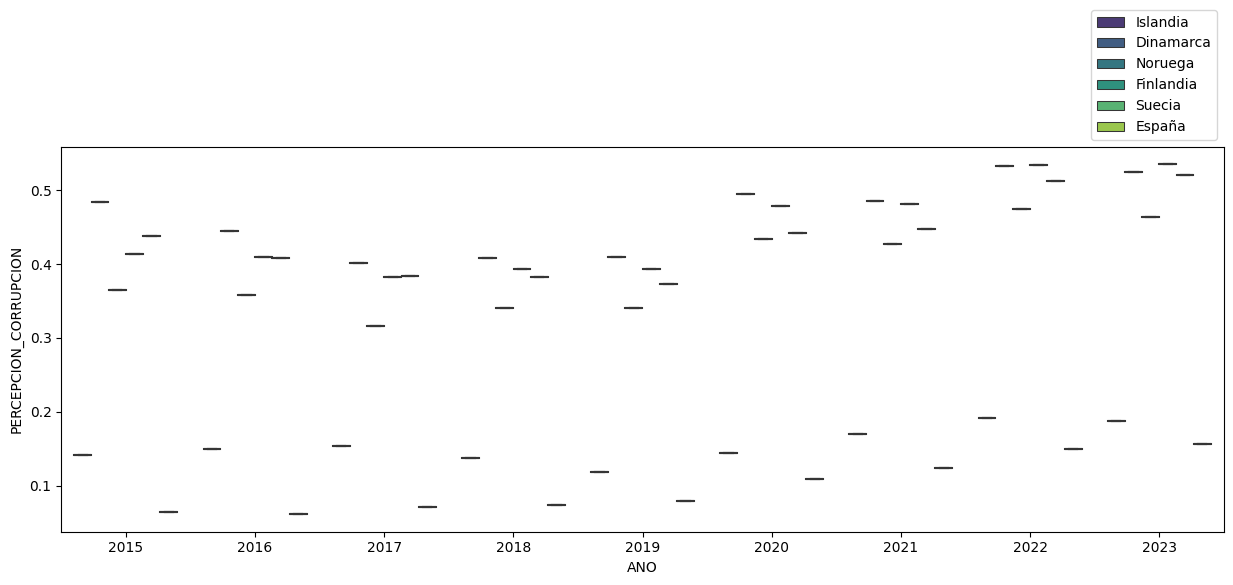

In [24]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x='ANO', y='PERCEPCION_CORRUPCION', hue='PAIS', palette='viridis')
plt.legend(loc='lower right', bbox_to_anchor=(1, 1))

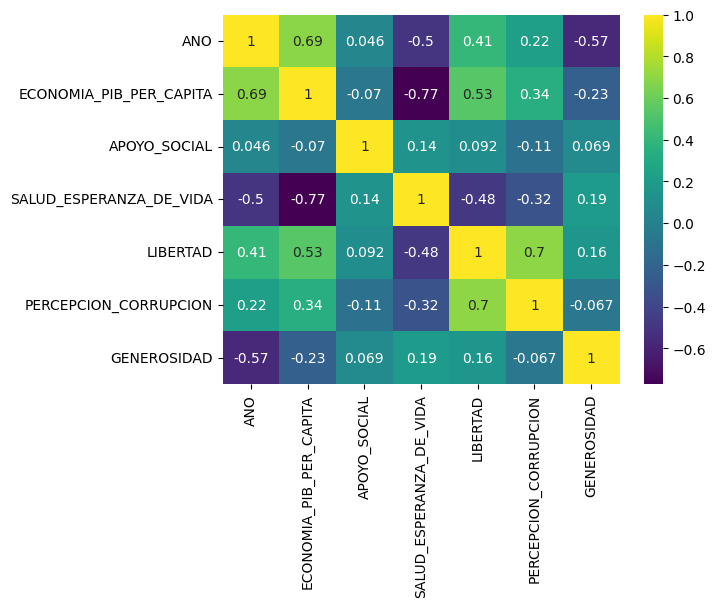

In [25]:
# sns.heatmap
df_corr = df.corr(numeric_only=True)
sns.heatmap(df_corr, annot=True, cmap='viridis');

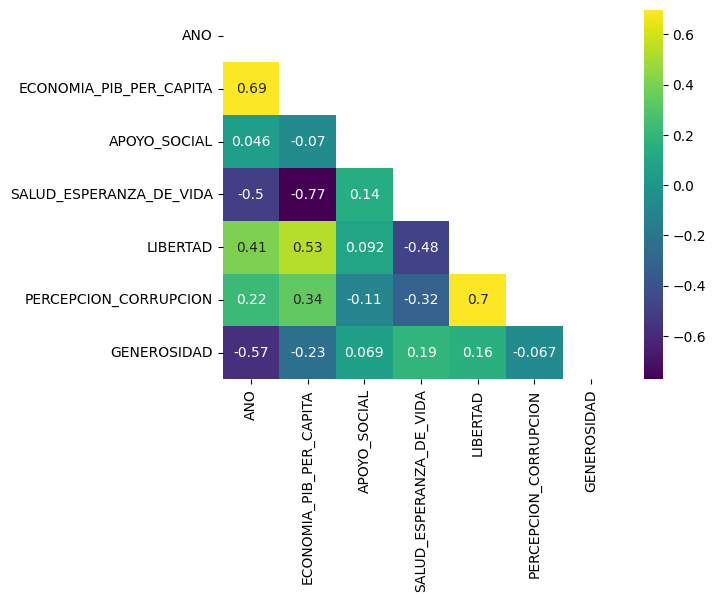

In [26]:
import numpy as np

df_corr = df.corr(numeric_only=True)
filter = np.triu(df_corr) # np.tril para el triángulo superior
sns.heatmap(df_corr, annot=True, cmap='viridis', mask=filter);

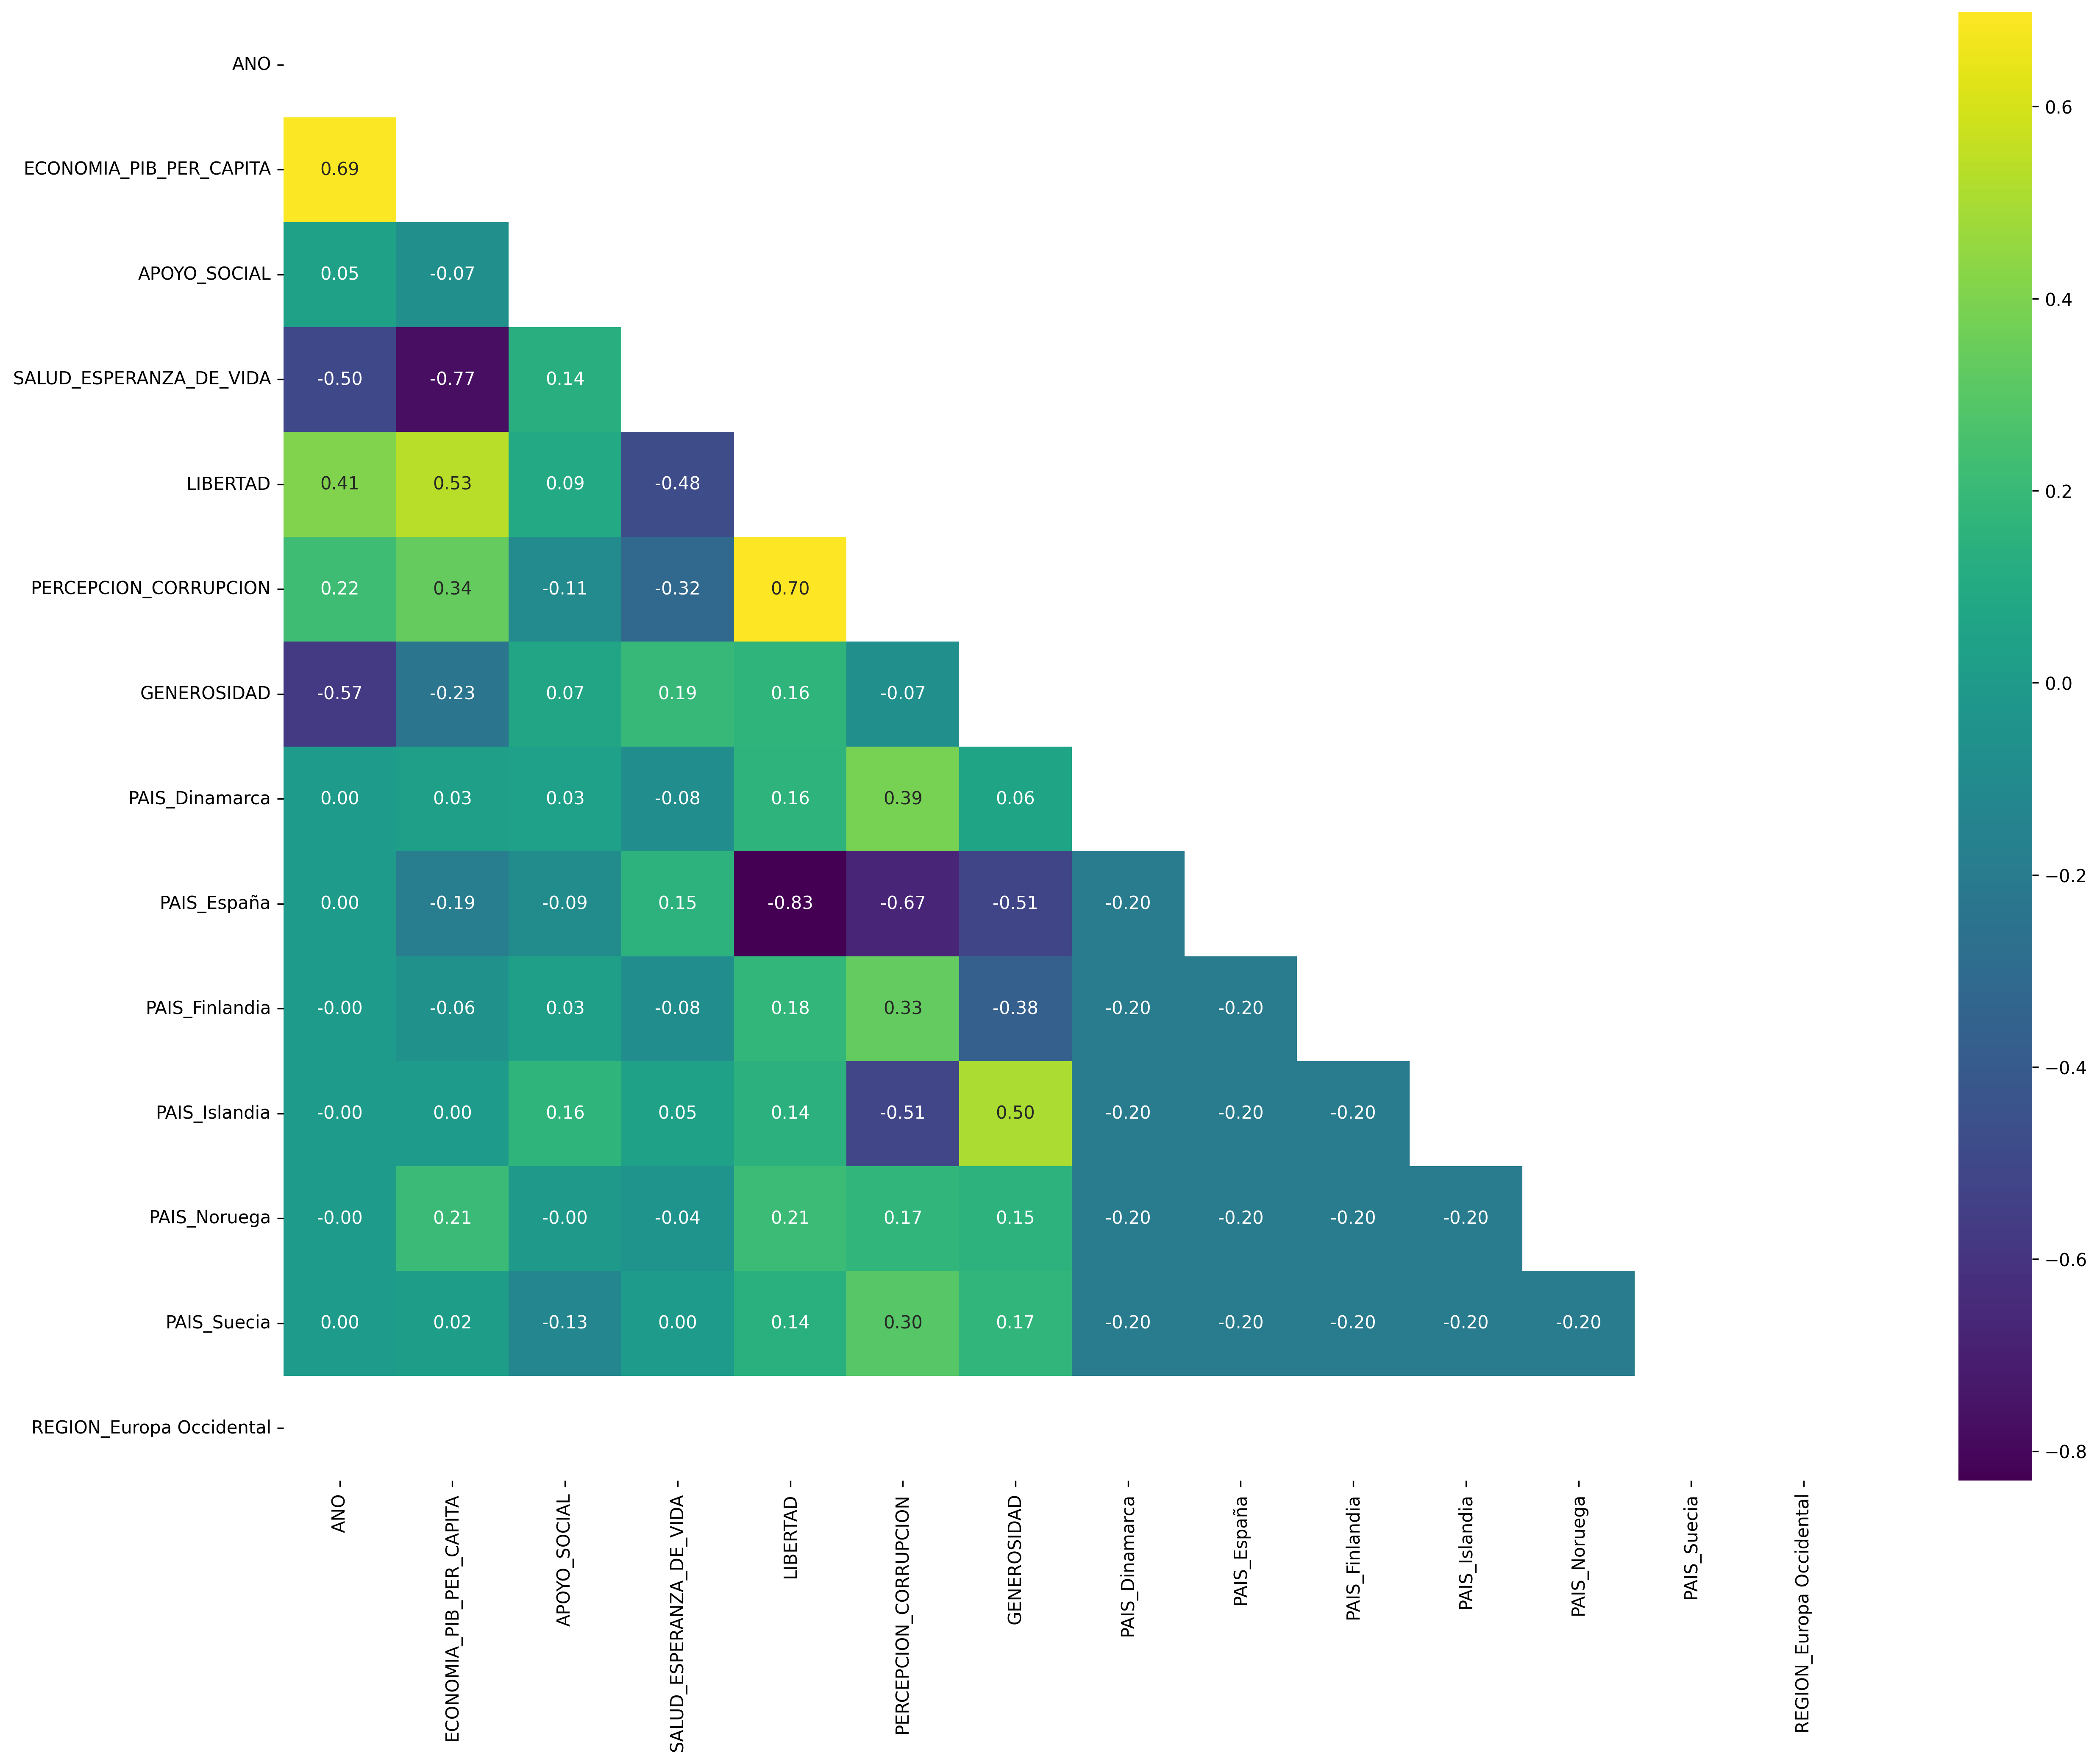

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(20,15), dpi=300)
df = pd.get_dummies(df)
df_corr = df.corr()
filter = np.triu(df_corr) 
sns.heatmap(df_corr, annot=True, cmap='viridis', mask=filter, fmt=".2f");

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'PAIS_Islandia'),
  Text(1, 0, 'SALUD_ESPERANZA_DE_VIDA'),
  Text(2, 0, 'PAIS_Suecia'),
  Text(3, 0, 'LIBERTAD'),
  Text(4, 0, 'PAIS_Noruega'),
  Text(5, 0, 'APOYO_SOCIAL'),
  Text(6, 0, 'PAIS_Dinamarca'),
  Text(7, 0, 'PERCEPCION_CORRUPCION'),
  Text(8, 0, 'ECONOMIA_PIB_PER_CAPITA'),
  Text(9, 0, 'PAIS_Finlandia'),
  Text(10, 0, 'PAIS_España'),
  Text(11, 0, 'ANO'),
  Text(12, 0, 'REGION_Europa Occidental')])

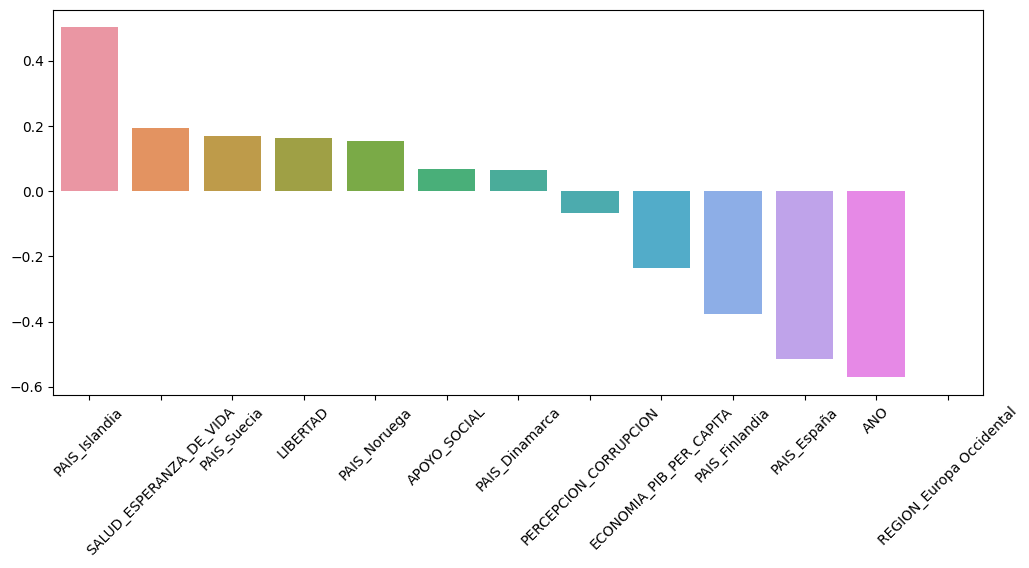

In [30]:
# correlación con barras para la columna GENEROSIDAD

df_corr = df.corr() # matriz de correlación
corr_price = df_corr['GENEROSIDAD'] # filtrar correlación GENEROSIDAD
corr_price = corr_price.sort_values(ascending=False)[1:] # ordenar descendente
plt.figure(figsize=(12, 5))
sns.barplot(x=corr_price.index, y=corr_price.values)
plt.xticks(rotation=45)

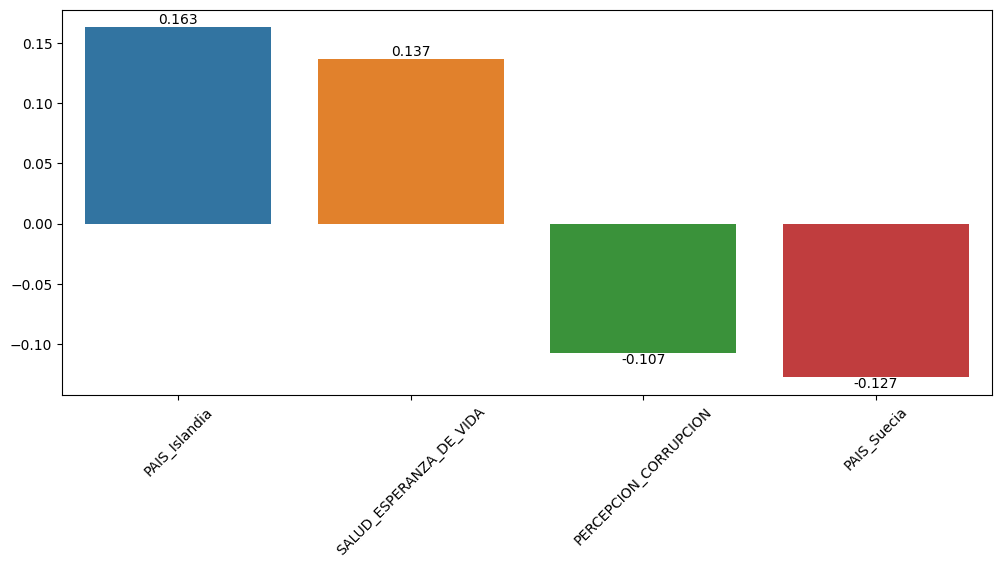

In [32]:
df_corr = df.corr() # matriz de correlación

corr_APOYO_SOCIAL = df_corr['APOYO_SOCIAL'] # filtrar correlación APOYO_SOCIAL
filter = (corr_APOYO_SOCIAL < -0.1) | (corr_APOYO_SOCIAL > 0.1) # quitar aquellas con baja correlación
corr_APOYO_SOCIAL = corr_APOYO_SOCIAL[filter]
corr_APOYO_SOCIAL = corr_APOYO_SOCIAL.sort_values(ascending=False)[1:] # ordenar descendente


plt.figure(figsize=(12, 5))
ax = sns.barplot(x=corr_APOYO_SOCIAL.index, y=corr_APOYO_SOCIAL.values)
plt.xticks(rotation=45)

labels = [f'{value:.3f}' for value in corr_APOYO_SOCIAL.values] # redondear las correlaciones a dos decimales
# labels = [str(round(value, 2)) for value in corr_APOYO_SOCIAL.values]
ax.bar_label(ax.containers[0], labels=labels);

In [33]:
df.columns

Index(['ANO', 'ECONOMIA_PIB_PER_CAPITA', 'APOYO_SOCIAL',
       'SALUD_ESPERANZA_DE_VIDA', 'LIBERTAD', 'PERCEPCION_CORRUPCION',
       'GENEROSIDAD', 'PAIS_Dinamarca', 'PAIS_España', 'PAIS_Finlandia',
       'PAIS_Islandia', 'PAIS_Noruega', 'PAIS_Suecia',
       'REGION_Europa Occidental'],
      dtype='object')

In [34]:
df.shape

(54, 14)

In [35]:
df.size

756

In [37]:
sns.clustermap(pivot, cmap='viridis')

NameError: name 'pivot' is not defined

In [ ]:
sns.clustermap(df_pivot, cmap="viridis", standard_scale=1)